# Aligning Horizons
Workflow: Finding the horizon line in the image
Rotate the image such that the horizon line is horizontal

# Attempt #1

In [1]:
!pip install opencv-python
!pip install numpy

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

median_angle: 18.0degrees
height: 269
width: 480


False

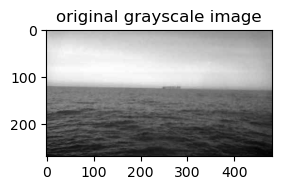

In [3]:
def align_horizons(image_path):
    image = cv2.imread(image_path)
    
    #Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    #Display grayscale image
    plt.subplot(1,2,1)
    plt.imshow(gray, cmap = 'gray')
    plt.title('original grayscale image')
    
    #Use HoughLines function to detect lines in the image
    #https://docs.opencv.org/3.4/d9/db0/tutorial_hough_lines.html
    lines = cv2.HoughLines(gray, 1, np.pi/180, threshold = 100)
    
    #Calculate angle (in degrees) of the detected lines
    angles = [np.degrees(line[0][1]) for line in lines]
    #print(angles)
    
    #Compute median angle to avoid outliers
    median_angle = 90-np.median(angles)
    print("median_angle: " + str(median_angle) + "degrees")
    
    #Rotate image to align the horizon
    rotated_image = rotate_image(image, median_angle)
    
    return rotated_image


def rotate_image(image, angle):
    
    #Get image dimensions
    height, width = image.shape[:2]
    print("height: " + str(height))
    print("width: " + str(width))
    
    #Calculate rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), angle*180/np.pi, 1)
    
    #Apply rotation to image
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height), flags = cv2.INTER_LINEAR)
    
    return rotated_image


image_path = "testImages/part2.jpg"
aligned_image = align_horizons(image_path)

#Save aligned image
cv2.imwrite("testImages/tiltingHorizons/aligned2.jpg", aligned_image)

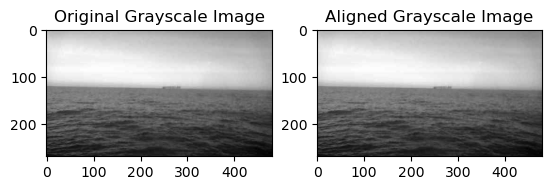

False

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def align_horizons(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Display the original grayscale image
    plt.subplot(1, 2, 1)
    plt.imshow(gray, cmap='gray')
    plt.title('Original Grayscale Image')

    # Use the Sobel operator to find gradients in the x and y directions
    gradient_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    gradient_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

    # Calculate the dominant gradient direction
    gradient_direction = np.arctan2(gradient_y, gradient_x)

    # Calculate the rotation angle (median of gradient directions)
    median_angle = np.median(gradient_direction) * 180 / np.pi

    # Rotate the original image to align the horizon
    rotated_image = rotate_image(image, median_angle)

    # Convert the rotated image to grayscale
    rotated_gray = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2GRAY)

    # Display the aligned grayscale image
    plt.subplot(1, 2, 2)
    plt.imshow(rotated_gray, cmap='gray')
    plt.title('Aligned Grayscale Image')

    plt.show()

    return rotated_image

def rotate_image(image, angle):
    # Get the image dimensions
    height, width = image.shape[:2]

    # Calculate the rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)

    # Apply the rotation to the image
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height), flags=cv2.INTER_LINEAR)

    return rotated_image

# Example usage
image_path = "testImages/part2.jpg"
aligned_image = align_horizons(image_path)

# Save the aligned image
cv2.imwrite("testImages/tiltingHorizons/aligned2.jpg", aligned_image)


Attempt 1 review: 
seems like nothing much changed. 

# Attempt 2: Hough Line library

https://docs.opencv.org/3.4/d9/db0/tutorial_hough_lines.html

In [5]:
import sys
import math
import cv2 as cv
import numpy as np
import os

In [6]:
ls

Crop, Animate.ipynb
DownloadingBuoyImages.ipynb
aligningHorizons.ipynb
automatically_download_crop_animate.ipynb
automatically_download_crop_animate.nbconvert.ipynb
downloadedImages/
edges.jpg
hed_model/
run_notebook.py*
testImages/


In [ ]:
def main(argv):
    default_file = 'testImages/part1.jpg'
    filename = argv[0] if len(argv) > 0 and os.path.isfile(argv[0]) else default_file
    
#      # Get the full path to the image file
#     full_path = os.path.abspath(filename)
#     print("Full path to image:", full_path)

    # Loads an image
    src = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

    # Check if image is loaded fine
    if src is None:
        print('Error opening image!')
        print('Usage: hough_lines.py [image_name -- default ' + default_file + '] \n')
        return -1

    dst = cv2.Canny(src, 50, 200, None, 3)

    # Copy edges to the images that will display the results in BGR
    cdst = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)
    cdstP = np.copy(cdst)

    lines = cv2.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)

    if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000 * (-b)), int(y0 + 1000 * (a)))
            pt2 = (int(x0 - 1000 * (-b)), int(y0 - 1000 * (a)))
            cv2.line(cdst, pt1, pt2, (0, 0, 255), 3, cv2.LINE_AA)

    linesP = cv2.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)

    if linesP is not None:
        for i in range(0, len(linesP)):
            l = linesP[i][0]
            cv2.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0, 0, 255), 3, cv2.LINE_AA)

#     cv2.imshow("Source", src)
#     cv2.imshow("Detected Lines (in red) - Standard Hough Line Transform", cdst)
#     cv2.imshow("Detected Lines (in red) - Probabilistic Line Transform", cdstP)

    cv2.waitKey()
    return 0

if __name__ == "__main__":
    main(sys.argv[1:])

# Attempt 3: using Sobel
calculate the derivatives from an image.

https://docs.opencv.org/3.4/d2/d2c/tutorial_sobel_derivatives.html

In [ ]:
import cv2
import numpy as np
import os

In [ ]:
def calculate_average_angle(image_paths):
    angles = []

    for image_path in image_paths:
        # Read the image
        image = cv2.imread(image_path)

        # Convert the image to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Use the Sobel operator to find gradients in the x and y directions
        gradient_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
        gradient_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

        # Calculate the dominant gradient direction
        gradient_direction = np.arctan2(gradient_y, gradient_x)

        # Calculate the angle of the horizon and append to the list
        horizon_angle = np.median(gradient_direction) * 180 / np.pi
        angles.append(horizon_angle)

    # Calculate the average angle
    average_angle = np.mean(angles)

    return average_angle

In [ ]:
def rotate_images(image_paths, average_angle):
    for image_path in image_paths:
        # Read the image
        image = cv2.imread(image_path)

        # Rotate the image to align the horizon
        rotated_image = rotate_image(image, -average_angle)

        # Save the rotated image
        base_path, ext = os.path.splitext(image_path)
        rotated_image_path = f"{base_path}_rotated{ext}"
        cv2.imwrite(rotated_image_path, rotated_image)

In [ ]:
def rotate_image(image, angle):
    # Get the image dimensions
    height, width = image.shape[:2]

    # Calculate the rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)

    # Apply the rotation to the image
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height), flags=cv2.INTER_LINEAR)

    return rotated_image

In [ ]:
image_paths = ["testImages/part1.jpg", "testImages/part2.jpg", "testImages/part3.jpg", "testImages/part4.jpg", "testImages/part5.jpg", "testImages/part6.jpg"]

In [ ]:
average_angle = calculate_average_angle(image_paths)
average_angle

In [ ]:
rotate_images(image_paths, average_angle)

In [ ]:
pip install pillow 

In [ ]:
ls

In [ ]:
#Show the images
from PIL import Image
from IPython.display import display  # Use this line if you are working in Jupyter Notebook

#specify image files
image_paths = [
    "testImages/part1_rotated.jpg",
    "testImages/part2_rotated.jpg",
    "testImages/part3_rotated.jpg",
    "testImages/part4_rotated.jpg",
    "testImages/part5_rotated.jpg",
    "testImages/part6_rotated.jpg",
]

# Open and display each image in a loop
for path in image_paths:
    image = Image.open(path)
    display(image)

Attempt 2 review: seems like the average angle that was got is not appliable for all of the images- images end up being TOO rotated

# Attempt 4: Hough Line Transform
Also Hough Line Transform, but with more systematic steps this time to see the process

In [ ]:
from skimage.transform import (hough_line, hough_line_peaks)
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [ ]:
image = cv2.imread("testImages/part1.jpg", 0)

#Invert image to show b;acl background 
image = ~image
plt.imshow(image, cmap = 'gray')

In [ ]:
#set precision of 1 degree
#Increase the number of points if needed
tested_angles = np.linspace(-np.pi/2, np.pi/2, 180)

#Perform hough transformation to change x, y, to h, theta and dist space
hspace, theta, dist = hough_line(image, tested_angles)
plt.figure(figsize = (10,10))
plt.imshow(hspace)

In [ ]:
h, q, d = hough_line_peaks(hspace, theta, dist)

In [ ]:
#Plot detected lines
#Empty list to capture all angles

angle_list = []

#Generate figure 1
fig, axes = plt.subplots(1, 3, figsize = (15, 6))
ax = axes.ravel()

ax[0].imshow(image, cmap = "gray")
ax[0].set_title('input image')
ax[0].set_axis_off()

ax[1].imshow(np.log(1 + hspace),
            extent = [np.rad2deg(theta[-1]), np.rad2deg(theta[0]), dist[-1], dist[0]],
            cmap = 'gray', aspect = 1/1.5)

ax[1].set_title('Hough Transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(image, cmap = 'gray')
origin = np.array((0, image.shape[1]))

for _, angle, dist in zip(*hough_line_peaks(hspace, theta, dist)):
    angle_list.append(angle) #Not for plotting but later calculation of angles
    y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
    ax[2].plot(origin, (y0, y1), '-r')

ax[2].set_xlim(origin)
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title("detected lines")

plt.tight_layout()
plt.show()

In [ ]:
angles = [a*180/np.pi for a in angle_list]
print(angles)

Attempt 3 review: 
Seems like Hough Line Transform detects too many lines in these images

# Attempt 5: Detecting edges instead of lines, using HoughLinesP
using HoughLinesP instead of HoughLines: directly takes edges as input, eliminating the need for a separate edge detection step.

In [ ]:
import cv2
import numpy as np

In [ ]:
ls

In [ ]:
img = cv2.imread('testImages/part1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
plt.imshow(img, cmap = 'gray')

In [ ]:
edges = cv2.Canny(gray, 50, 150, apertureSize = 3)
cv2.imshow('edges', edges)

lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength = 100, maxLineGap = 10)

# Check if lines is not None before iterating
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    cv2.imshow('image', img)
    k = cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("No lines detected.")

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from matplotlib import image as image

I = image.imread('testImages/part1.jpg') 
G = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

# Canny Edge Detection:
Threshold1 = 150;
Threshold2 = 350;
FilterSize = 5
E = cv2.Canny(G, Threshold1, Threshold2, FilterSize)

Rres = 1
Thetares = 1*np.pi/180
Threshold = 1
minLineLength = 1
maxLineGap = 100
lines = cv2.HoughLinesP(E,Rres,Thetares,Threshold,minLineLength,maxLineGap)
N = lines.shape[0]
for i in range(N):
    x1 = lines[i][0][0]
    y1 = lines[i][0][1]    
    x2 = lines[i][0][2]
    y2 = lines[i][0][3]    
    cv2.line(I,(x1,y1),(x2,y2),(255,0,0),2)

plt.figure(),plt.imshow(I),plt.title('Hough Lines'),plt.axis('off')
plt.show()

Attempt 4 review: Seems like edge detection doesnt seem to work, it seems like it cannot detect any shapes or edges in the image

# Attempt 6: Edge detection using holistically nested edge detection (HED)
Original HED papr: https://arxiv.org/pdf/1504.06375.pdf

Youtube tutorial: https://www.youtube.com/watch?v=UIrvEG9Oj1s&ab_channel=DigitalSreeni

Process:
1. Define crop layer (which part of the image to be used)
2. Define network and load pre-trained model
3. register crop layer w network
4. Read image
5. Create blob from image: Create a pre-processed image
6. Load pretrained model (proto text) 
7. Pass image through model

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
ls

In [ ]:
# load the input image and grab its dimensions, for future use while defining the blob
img = cv2.imread("testImages/part1.jpg")

# Check if the image is successfully loaded
if img is None:
    print("Error: Unable to load the image.")
else:
    # Convert the image to RGB format (OpenCV uses BGR by default)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the original image
    plt.imshow(img_rgb)
    plt.title("Original Image")
    plt.show()

    # Apply Canny edge detection
    canny_edge = cv2.Canny(img, 50, 150)

    # Display the Canny edge image
    plt.imshow(canny_edge, cmap='gray')  # Use cmap='gray' for grayscale images
    plt.title("Canny Edge Detection")
    plt.show()

In [ ]:
#Autocanny
sigma = 0.3
median = np.median(img)

In [ ]:
# apply automatic Canny edge detection using the computed median
lower = int(max(0, (1.0 - sigma) * median))
upper = int(min(255, (1.0 + sigma) * median))
auto_canny = cv2.Canny(img, lower, upper)
plt.imshow(auto_canny)

In [ ]:
# The pre-trained model that OpenCV uses has been trained in Caffe framework
protoPath = "hed_model/deploy.prototxt"
modelPath = "hed_model/hed_pretrained_bsds.caffemodel"
net = cv2.dnn.readNetFromCaffe(protoPath, modelPath)

In [ ]:
# load the input image and grab its dimensions, for future use while defining the blob
img = cv2.imread("testImages/part1.jpg")
plt.imshow(img)
(H, W) = img.shape[:2]

In [ ]:
# construct a blob out of the input image 
#blob is basically preprocessed image. 
#OpenCV’s new deep neural network (dnn ) module contains two functions that 
#can be used for preprocessing images and preparing them for 
#classification via pre-trained deep learning models.
# It includes scaling and mean subtraction
#How to calculate the mean?
mean_pixel_values= np.average(img, axis = (0,1))
blob = cv2.dnn.blobFromImage(img, scalefactor=0.7, size=(W, H),
                             #mean=(mean_pixel_values[0], mean_pixel_values[1], mean_pixel_values[2]),
                             mean=(105, 117, 123),
                             swapRB= False, crop=False)

In [ ]:
#View image after preprocessing (blob)
blob_for_plot = np.moveaxis(blob[0,:,:,:], 0,2)
plt.imshow(blob_for_plot)

In [ ]:
# set the blob as the input to the network and perform a forward pass
# to compute the edges
net.setInput(blob)
hed = net.forward()
hed = hed[0,0,:,:]  #Drop the other axes 
#hed = cv2.resize(hed[0, 0], (W, H))
hed = (255 * hed).astype("uint8")  #rescale to 0-255

plt.imshow(hed, cmap='gray')

#Save the image without the axes
# Turn off axes
plt.axis('off')
plt.savefig('testImages/attempt5_HED/HEDImage1.png')  # Replace with the desired file path and format

# Show the saved image path
print("Image saved successfully.")
print("HED image saved:")

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.title("original mage")
plt.imshow(img)
plt.subplot(132)
plt.title("Canny")
plt.imshow(auto_canny)
plt.subplot(133)
plt.title("HED")
plt.imshow(hed)

# then use HoughLines Transform Angle detection on this new HED image 
Hopefully this would work, since the contrast is a lot higher and the horizon line seems a lot more clear now

Referring to attempt 4

In [ ]:
from skimage.transform import (hough_line, hough_line_peaks)

In [ ]:
image = cv2.imread("testImages/attempt5_HED/HEDImage1.png", 0)

#Invert image to show b;acl background 
image = ~image
plt.imshow(image, cmap = 'gray')

In [ ]:
#set precision of 1 degree
#Increase the number of points if needed
tested_angles = np.linspace(-np.pi/2, np.pi/2, 180)

#Perform hough transformation to change x, y, to h, theta and dist space
hspace, theta, dist = hough_line(image, tested_angles)
plt.figure(figsize = (10,10))
plt.imshow(hspace)

In [ ]:
h, q, d = hough_line_peaks(hspace, theta, dist)

In [ ]:
#Plot detected lines
#Empty list to capture all angles

angle_list = []

#Generate figure 1
fig, axes = plt.subplots(1, 3, figsize = (15, 6))
ax = axes.ravel()

ax[0].imshow(image, cmap = "gray")
ax[0].set_title('input image')
ax[0].set_axis_off()

ax[1].imshow(np.log(1 + hspace),
            extent = [np.rad2deg(theta[-1]), np.rad2deg(theta[0]), dist[-1], dist[0]],
            cmap = 'gray', aspect = 1/1.5)

ax[1].set_title('Hough Transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(image, cmap = 'gray')
origin = np.array((0, image.shape[1]))

for _, angle, dist in zip(*hough_line_peaks(hspace, theta, dist)):
    angle_list.append(angle) #Not for plotting but later calculation of angles
    y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
    ax[2].plot(origin, (y0, y1), '-r')

ax[2].set_xlim(origin)
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title("detected lines")

plt.tight_layout()
plt.show()

In [ ]:
angles = [a*180/np.pi for a in angle_list]
print(angles)

Attempt 6 review: Ohno, for some reason the Hough Lines Transform method doesn't seem to be able to detect the horizon line!

# Attempt 7: Finding pixel change between ocean and the horizon (sky)

In [ ]:
import cv2
import numpy as np
from IPython.display import display, Image

#Load image
image = cv2.imread("testImages/part4.jpg")

#convert image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
# Define a threshold value (adjust as needed)
threshold = 1.5

In [ ]:
# Find the leftmost point of color change
left_point = None
for row in range(gray_image.shape[0]):
    color_change = abs(int(gray_image[row, 1]) - int(gray_image[row, 0]))
    if color_change > threshold:
        left_point = (1, row)
        break
        
        
# Find the rightmost point of color change
right_point = None
for row in range(gray_image.shape[0]):
    color_change = abs(int(gray_image[row, gray_image.shape[1] - 1]) - int(gray_image[row, gray_image.shape[1] - 2]))
    if color_change > threshold:
        right_point = (gray_image.shape[1] - 1, row)
        break
        
        
# Draw a line joining the left and right points
if left_point is not None and right_point is not None:
    cv2.line(image, left_point, right_point, (0, 255, 0), 2)

In [ ]:
ls

In [ ]:
# Display the image with the horizon line

# Save the modified image temporarily
cv2.imwrite('testImages/attempt7/ocean.jpg', image)

# Display the image inline
display(Image(filename='testImages/attempt7/ocean.jpg'))

In [ ]:
# Define a threshold value (adjust as needed)
threshold2 = 10

In [ ]:
#Find horizontal line of color change 

# Scan rows of pixels to find the horizon
horizon_row = None
for row in range(gray_image.shape[0]):
    if row == 0:
        continue
    color_change = abs(int(gray_image[row][0]) - int(gray_image[row - 1][0]))
    if color_change > threshold2:
        horizon_row = row
        break

In [ ]:
# Draw a line at the horizon on the original image
if horizon_row is not None:
    cv2.line(image, (0, horizon_row), (image.shape[1], horizon_row), (255, 0, 0), 2)

# Save the modified image temporarily
cv2.imwrite('testImages/attempt7/ocean_horizontal.jpg', image)

# Display the modified image inline
display(Image(filename='testImages/attempt7/ocean_horizontal.jpg'))

Attempt 7 review: the blue horizontal line generated is pretty accurate, but it doesn't seem to be able to detect the changes in gradient. The green line is just not accurate in detecting the edge at all. Both seem to rely on different thresholds for different images with different types of sunlights/ exposure etc.

# Attempt 8: Using Region-of-Interest Algorithm!

In [ ]:
import cv2
import numpy as np
from IPython.display import display, Image
import matplotlib.pyplot as plt

In [ ]:
#Load image
image = cv2.imread("testImages/part4.jpg")

print("Original image:")
display(Image(filename="testImages/part4.jpg"))

print(image.shape)

In [ ]:
#matplotlib library reads color in RGB format but OpenCV reads color in BGR Format
#Convert BGR to RGB
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

#Defining a rectangle of region of interest
cv2.rectangle(image, (0, 100), (480, 160), (255, 0, 0), 3) #Height, width, color of rect, stroke width

plt.figure(figsize = (10,5))
plt.imshow(image)

In [ ]:
#Show the region of interest
plt.imshow(image[100:160, 0:480])

In [ ]:
# Define a rectangle for the region of interest (ROI)
roi = image[100:160, 0:480]

In [ ]:
# Show the region of interest
plt.figure(figsize=(10, 5))
plt.imshow(roi)
plt.axis('off')  # Hide axes
plt.show()

In [ ]:
# Save the cropped region as a new image
cv2.imwrite("testImages/aligningHorizons/Attempt9-ROI/cropped_roi.jpg", cv2.cvtColor(roi, cv2.COLOR_RGB2BGR))

In [ ]:
# #convert image to grayscale
# image = cv2.imread("testImages/aligningHorizons/Attempt9-ROI/cropped_roi.jpg")
# gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
# # Define a threshold value (adjust as needed)
# threshold = 5

In [ ]:
# # Find the leftmost point of color change
# left_point = None
# for row in range(gray_image.shape[0]):
#     color_change = abs(int(gray_image[row, 1]) - int(gray_image[row, 0]))
#     if color_change > threshold:
#         left_point = (1, row)
#         break
        
        
# # Find the rightmost point of color change
# right_point = None
# for row in range(gray_image.shape[0]):
#     color_change = abs(int(gray_image[row, gray_image.shape[1] - 1]) - int(gray_image[row, gray_image.shape[1] - 2]))
#     if color_change > threshold:
#         right_point = (gray_image.shape[1] - 1, row)
#         break
        
        
# # Draw a line joining the left and right points
# if left_point is not None and right_point is not None:
#     cv2.line(image, left_point, right_point, (0, 255, 0), 2)

In [ ]:
# # Display the image with the horizon line

# # Save the modified image temporarily
# cv2.imwrite("testImages/aligningHorizons/Attempt9-ROI/cropped_roi_edge.jpg", image)

# # Display the image inline
# display(Image(filename="testImages/aligningHorizons/Attempt9-ROI/cropped_roi_edge.jpg"))

In [ ]:
# # Define a threshold value (adjust as needed)
# threshold2 = 10

In [ ]:
# #Find horizontal line of color change 

# # Scan rows of pixels to find the horizon
# horizon_row = None
# for row in range(gray_image.shape[0]):
#     if row == 0:
#         continue
#     color_change = abs(int(gray_image[row][0]) - int(gray_image[row - 1][0]))
#     if color_change > threshold2:
#         horizon_row = row
#         break

In [ ]:
# # Draw a line at the horizon on the original image
# if horizon_row is not None:
#     cv2.line(image, (0, horizon_row), (image.shape[1], horizon_row), (255, 0, 0), 2)

# # Save the modified image temporarily
# cv2.imwrite("testImages/aligningHorizons/Attempt9-ROI/cropped_roi_edge2.jpg", image)

# # Display the modified image inline
# display(Image(filename="testImages/aligningHorizons/Attempt9-ROI/cropped_roi_edge2.jpg"))

# Attempt 9: Hough transform on cropped ROI Image

In [70]:
!pip install opencv-python
!pip install numpy

In [197]:
import cv2
import numpy as np
from IPython.display import display, Image
import matplotlib.pyplot as plt

Original image:


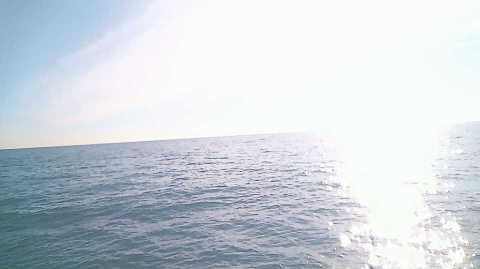

(269, 480, 3)


In [215]:
#Load image
image = cv2.imread("testImages/part4.jpg")

print("Original image:")
display(Image(filename="testImages/part4.jpg"))

print(image.shape)

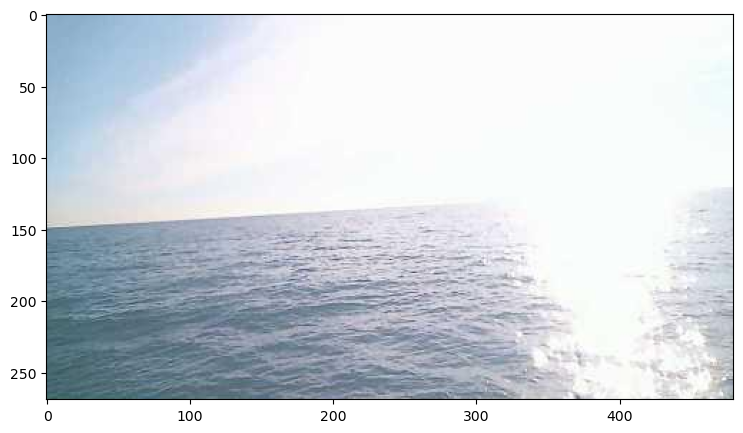

In [216]:
#matplotlib library reads color in RGB format but OpenCV reads color in BGR Format
#Convert BGR to RGB
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

#Defining a rectangle of region of interest
# cv2.rectangle(image, (0, 100), (480, 160), (255, 0, 0), 3) #Height, width, color of rect, stroke width

plt.figure(figsize = (10,5))
plt.imshow(image)

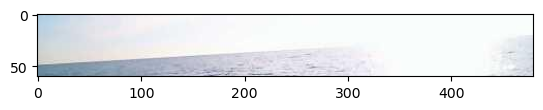

In [217]:
#Show the region of interest
plt.imshow(image[100:160, 0:480])

In [218]:
# Define a rectangle for the region of interest (ROI)
roi = image[100:160, 0:480]

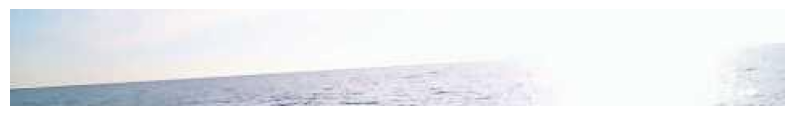

In [219]:
# Show the region of interest
plt.figure(figsize=(10, 5))
plt.imshow(roi)
plt.axis('off')  # Hide axes
plt.show()

In [220]:
# Save the cropped region as a new image
cv2.imwrite("testImages/aligningHorizons/Attempt9-ROI/cropped_roi.jpg", cv2.cvtColor(roi, cv2.COLOR_RGB2BGR))

True

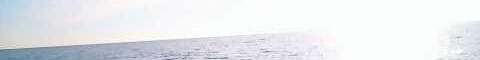

In [221]:
# Display current cropped ROI image inline
display(Image(filename="testImages/aligningHorizons/Attempt9-ROI/cropped_roi.jpg"))

In [222]:
img = cv2.imread("testImages/aligningHorizons/Attempt9-ROI/cropped_roi.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150, apertureSize = 3)

#lines = output vector of lines
#lines = cv.HoughLines(image, rho, theta, threshold)
#rho = distance resolution of the accumulator in pixels
#theta = angle resolution of the accumulator in RADIANS
lines = cv2.HoughLines(edges, 1, np.pi/180, 110)

In [223]:
for line in lines: 
    #rho = distance from top left corner (0,0)
    #theta = line rotation angle in radians
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    # x1 stores the rounded off value of (r * cos(theta) - 1000 * sin(theta))
    x1 = int(x0 + 1000 * (-b))
    # y1 stores the rounded off value of (r * sin(theta)+ 1000 * cos(theta))
    y1 = int(y0 + 1000 * (a))
    # x2 stores the rounded off value of (r * cos(theta)+ 1000 * sin(theta))
    x2 = int(x0 - 1000 * (-b))
    # y2 stores the rounded off value of (r * sin(theta)- 1000 * cos(theta))
    y2 = int(y0 - 1000 * (a))
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)
    
# plt.imshow('image', img)
# k = cv2.waitKey(0)
# cv2.destroyAllWindows()

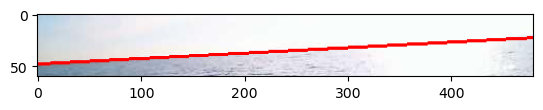

True

In [225]:
# image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(img_bgr)
plt.show()

# Save the image to your local folder
cv2.imwrite("testImages/aligningHorizons/Attempt9-ROI/cropped_roi_with_lines.jpg", img)

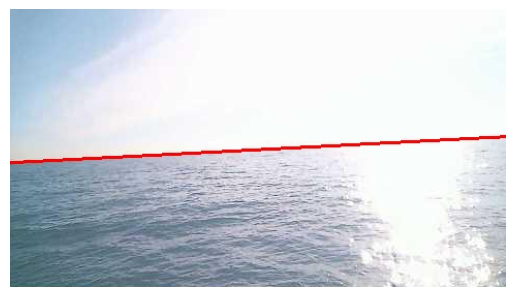

In [231]:
# Read the original image
original_image = cv2.imread("testImages/part4.jpg")

# Read the image with lines detected
cropped_with_lines = cv2.imread("testImages/aligningHorizons/Attempt9-ROI/cropped_roi_with_lines.jpg")

# Define the position where you want to place the cropped image on the original image
top_left_x = 0
top_left_y = 100
bottom_right_x = top_left_x + cropped_with_lines.shape[1]
bottom_right_y = top_left_y + cropped_with_lines.shape[0]

# Overlay the cropped image onto the original image
original_image[top_left_y:bottom_right_y, top_left_x:bottom_right_x] = cropped_with_lines

overlayed_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Display the overlayed image
plt.imshow(overlayed_image_rgb)
plt.axis('off')
plt.show()

In [232]:
# Save the resulting image
cv2.imwrite("testImages/aligningHorizons/Attempt9-ROI/overlayed_image.jpg", original_image)

True

# Rotating image
Okay, now we need to rotate this image: 
    
    - find the gradient 
    - rotate it the other direction such that the horizon is horizontal

In [235]:
#Finding gradient of the line that was generated in Hough Transform

import numpy as np

# Theta value obtained from Hough Transform
theta = line[0][1]

# Calculate gradient
gradient = -np.cos(theta) / np.sin(theta)
print(gradient)

-0.052407797


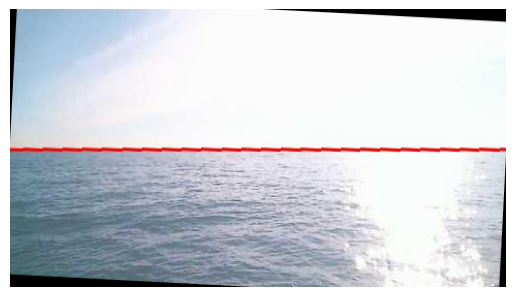

In [270]:
#Now, rotate the image the other way!

# Calculate the rotation angle (in degrees) from the negative gradient
rotation_angle_degrees = np.degrees(np.arctan(gradient))

# Rotate the image
rows, cols, _ = overlayed_image_rgb.shape
M = cv2.getRotationMatrix2D((cols / 2, rows / 2), rotation_angle_degrees, 1)
rotated_image = cv2.warpAffine(overlayed_image_rgb, M, (cols, rows))

# Save the rotated image
cv2.imwrite("testImages/aligningHorizons/Attempt9-ROI/rotated_image.jpg", cv2.cvtColor(rotated_image, cv2.COLOR_RGB2BGR))

# Display the rotated image
plt.imshow(rotated_image)
plt.axis('off')
plt.show()

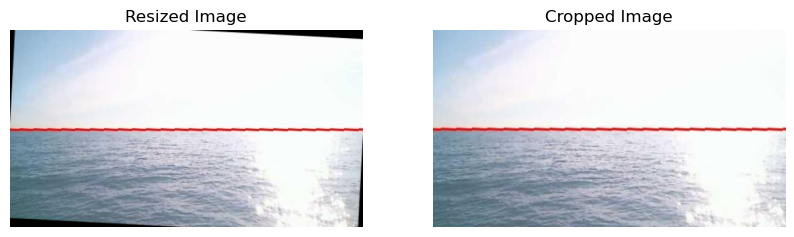

In [290]:
#expand the rotated image such that there's no longer any black parts left

# Read the image
image = cv2.imread("testImages/aligningHorizons/Attempt9-ROI/rotated_image.jpg")


# Get original dimensions
original_height, original_width = image.shape[:2]

# Define the desired dimensions for the final image
final_height = original_height
final_width = original_width

# Calculate scaling factors to make the image bigger
scale_factor = 1.1  # You can adjust this value according to your needs

# Resize the image while maintaining the aspect ratio
resized_width = int(original_width * scale_factor)
resized_height = int(original_height * scale_factor)
resized_image = cv2.resize(image, (resized_width, resized_height), interpolation=cv2.INTER_LINEAR)

# Calculate the cropping dimensions based on the desired final size
crop_start_x = (resized_width - final_width) // 2
crop_end_x = crop_start_x + final_width
crop_start_y = (resized_height - final_height) // 2
crop_end_y = crop_start_y + final_height

# Perform the cropping directly from the resized image
cropped_image = resized_image[crop_start_y:crop_end_y, crop_start_x:crop_end_x]

# Display original and cropped images inline
plt.figure(figsize=(10, 10))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.title('Resized Image')
plt.axis('off')

# Cropped Image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.title('Cropped Image')
plt.axis('off')

plt.show()

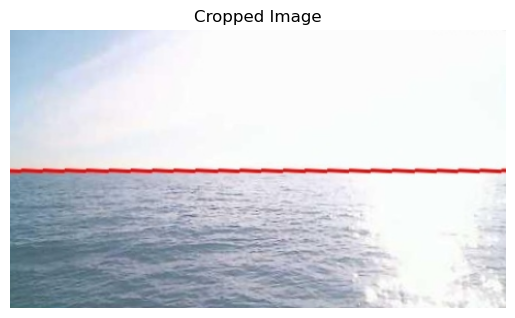

In [288]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.title('Cropped Image')
plt.axis('off')

plt.show()

# Perfect. Above was for testing- Now, we basically use the same mechanism to rotate and crop the original image without showing the red line.

In [295]:
#Finding gradient of the line that was generated in Hough Transform

import numpy as np

# Theta value obtained from Hough Transform
theta = line[0][1]

# Calculate gradient
gradient = -np.cos(theta) / np.sin(theta)
print(gradient)

-0.052407797


Original image:


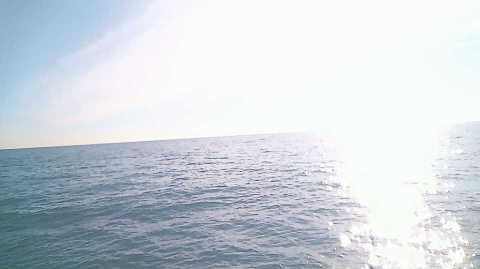

In [307]:
# Read the original image
imageOriginal = cv2.imread("testImages/part4.jpeg")

print("Original image:")
display(Image(filename="testImages/part4.jpeg"))

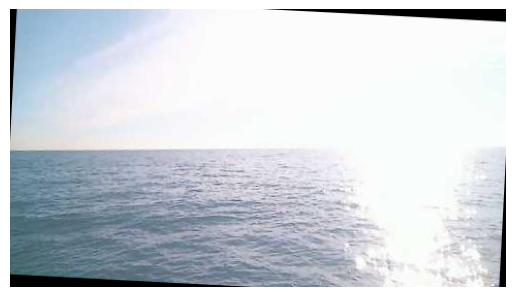

In [314]:
# Calculate the rotation angle (in degrees) from the negative gradient
rotation_angle_degrees = np.degrees(np.arctan(gradient))

# Rotate the image
rows, cols, _ = overlayed_image_rgb.shape
M = cv2.getRotationMatrix2D((cols / 2, rows / 2), rotation_angle_degrees, 1)
rotated_image = cv2.warpAffine(imageOriginal, M, (cols, rows))

# Save the rotated image
cv2.imwrite("testImages/aligningHorizons/Attempt9-ROI/rotated_image_2.jpg", rotated_image)

# Display the rotated image
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

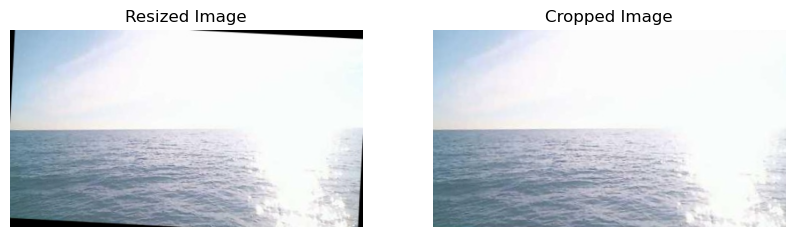

In [315]:
#expand the rotated image such that there's no longer any black parts left

# Read the image
image = cv2.imread("testImages/aligningHorizons/Attempt9-ROI/rotated_image_2.jpg")

# Get original dimensions
original_height, original_width = image.shape[:2]

# Define the desired dimensions for the final image
final_height = original_height
final_width = original_width

# Calculate scaling factors to make the image bigger
scale_factor = 1.1  # You can adjust this value according to your needs

# Resize the image while maintaining the aspect ratio
resized_width = int(original_width * scale_factor)
resized_height = int(original_height * scale_factor)
resized_image = cv2.resize(image, (resized_width, resized_height), interpolation=cv2.INTER_LINEAR)

# Calculate the cropping dimensions based on the desired final size
crop_start_x = (resized_width - final_width) // 2
crop_end_x = crop_start_x + final_width
crop_start_y = (resized_height - final_height) // 2
crop_end_y = crop_start_y + final_height

# Perform the cropping directly from the resized image
cropped_image = resized_image[crop_start_y:crop_end_y, crop_start_x:crop_end_x]

# Display original and cropped images inline
plt.figure(figsize=(10, 10))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.title('Resized Image')
plt.axis('off')

# Cropped Image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.title('Cropped Image')
plt.axis('off')

plt.show()

In [321]:
#Perfect. Now saved the cropped image
# Save the rotated image
cv2.imwrite("testImages/aligningHorizons/Attempt9-ROI/cropped_image_2.jpg", cropped_image)

True

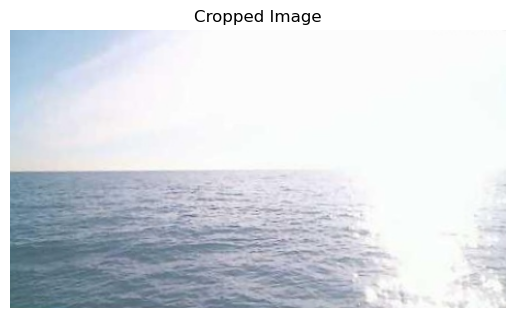

In [322]:
# Show final cropped image!
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.title('Cropped Image')
plt.axis('off')

plt.show()